# Описание проекта:

**Цель:** Создать модель машинного обучения для предсказания стоимости недвижимости в Раменском и Жуковском (Подмосковье) с использованием данных, полученных с помощью библиотеки Cianparser.

**Целевая аудитория:**

* Жители Раменского и Жуковского, владеющие недвижимостью и желающие оценить её стоимость.
* Люди, планирующие переезд в Раменское или Жуковский и интересующиеся ценами на недвижимость.

**Инструменты:**

* Python
* Библиотека Cianparser для сбора данных
* Библиотеки машинного обучения (Scikit-learn)
* Streamlit для создания интерактивного приложения

**Ожидаемые результаты:**

* Модель машинного обучения с MAPE <= 0.2, способная точно предсказывать стоимость недвижимости.
* Интерактивное приложение Streamlit, позволяющее пользователям вводить характеристики недвижимости и получать прогноз цены.

## Импорты

In [1]:
import pyforest

import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (mean_absolute_percentage_error, mean_absolute_error,
                             mean_squared_error, mean_squared_log_error,
                             median_absolute_error, r2_score)

from pycaret.regression import *

import skimpy
import chime

chime.theme('mario')
%load_ext chime

# RANDOM SEED (RANDOM STATE)
S = 100500

In [2]:
plt.style.use('dark_background')

## Загрузка и Обзор данных

In [3]:
df = pd.read_csv('suburban.csv',parse_dates=['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   author                2366 non-null   object        
 1   author_type           2367 non-null   object        
 2   url                   2388 non-null   object        
 3   location              2388 non-null   object        
 4   deal_type             2388 non-null   object        
 5   accommodation_type    2388 non-null   object        
 6   suburban_type         2388 non-null   object        
 7   price                 2388 non-null   int64         
 8   year_of_construction  2388 non-null   object        
 9   house_material_type   2388 non-null   object        
 10  land_plot             2388 non-null   object        
 11  land_plot_status      2388 non-null   object        
 12  heating_type          2388 non-null   int64         
 13  gas_type          

In [4]:
skimpy.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 2388   │ │ string      │ 16    │                                                          │
│ │ Number of columns │ 27     │ │ int32       │ 8     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 2     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_na ┃     ┃           ┃           ┃           ┃          ┃           ┃          ┃           ┃        ┃  │
│ ┃ me        ┃ NA  ┃ NA %      ┃ mean      ┃ sd        ┃ p0       ┃ p25       ┃ p75      ┃ p100      ┃ hist   ┃  │
│ ┡━━━━━━━━━━━╇━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━┩  │
│ │ price     │   0 │         0 │  39000000 │  89000000 │   590000 │  11000000 │ 28000000 │ 140000000 │   █    │  │
│ │           │     │           │           │           │          │           │          │         0 │        │  │
│ │ heating_t │   0 │         0 │        -1 │         0 │       -1 │        -1 │       -1 │        -1 │     █  │  │
│ │ ype       │     │           │           │           │          │           │          │           │        │  │
│ │ gas_type  │   0 │         0 │        -1 │         0 │       -1 │        -1 │       -1 │        -1 │     █  │  │
│ │ water_sup │   0 │         0 │        -1 │         0 │       -1 │        -1 │       -1 │        -1 │     █  │  │
│ │ ply_type  │     │           │           │           │          │           │          │           │        │  │
│ │ sewage_sy │   0 │         0 │        -1 │         0 │       -1 │        -1 │       -1 │        -1 │     █  │  │
│ │ stem      │     │           │           │           │          │           │          │           │        │  │
│ │ bathroom  │   0 │         0 │        -1 │         0 │       -1 │        -1 │       -1 │        -1 │     █  │  │
│ │ floors_co │   0 │         0 │       1.9 │       1.5 │       -1 │         2 │        3 │        42 │   █    │  │
│ │ unt       │     │           │           │           │          │           │          │           │        │  │
│ │ phone     │   0 │         0 │ -71000000 │ 170000000 │ -2000000 │ -20000000 │ 18000000 │ 190000000 │ █    ▄ │  │
│ │           │     │           │         0 │         0 │      000 │        00 │       00 │         0 │        │  │
│ │ price_per │ 394 │ 16.499162 │        -1 │         0 │       -1 │        -1 │       -1 │        -1 │     █  │  │
│ │ _month    │     │ 479061976 │           │           │          │           │          │           │        │  │
│ │ commissio │ 394 │ 16.499162 │         0 │         0 │        0 │         0 │        0 │         0 │     █  │  │
│ │ ns        │     │ 479061976 │           │           │          │           │          │           │        │  │
│ └───────────┴─────┴───────────┴───────────┴───────────┴──────────┴───────────┴──────────┴───────────┴────────┘  │
│                                                    dat

In [5]:
df.sample(1).T

,1789
author,Владис
author_type,real_estate_agent
url,https://www.cian.ru/sale/suburban/295219281/
location,Москва
deal_type,sale
accommodation_type,suburban
suburban_type,house
price,29000000
year_of_construction,2023
house_material_type,Монолитный


In [6]:
ignore_cols = ['author','url','deal_type','house_number','phone','commissions','price_per_month']

In [7]:
target = 'price'

In [8]:
df['year_of_construction'] = df[['year_of_construction']].replace(['Напишите автору','Позвоните автору'],'-1').astype('int')

In [9]:
cat_cols = df.select_dtypes(exclude=['number','datetime']).columns
cat_cols

Index(['author', 'author_type', 'url', 'location', 'deal_type',
       'accommodation_type', 'suburban_type', 'house_material_type',
       'land_plot', 'land_plot_status', 'living_meters', 'district',
       'underground', 'street', 'house_number'],
      dtype='object')

In [10]:
num_cols = df.select_dtypes(include=['number']).columns
num_cols

Index(['price', 'year_of_construction', 'heating_type', 'gas_type',
       'water_supply_type', 'sewage_system', 'bathroom', 'floors_count',
       'phone', 'price_per_month', 'commissions'],
      dtype='object')

In [11]:
date_cols = df.select_dtypes(include=['datetime']).columns
date_cols

Index(['date'], dtype='object')

In [12]:
for col in cat_cols:
    if col not in ignore_cols:
        display(df[[col]].value_counts())

author_type            
real_estate_agent          1461
realtor                     519
homeowner                   243
developer                    70
unknown                      67
official_representative       7
dtype: int64

location       
Москва             1712
Раменское           321
Жуковский            96
Видное               76
Домодедово           53
Одинцово             52
Долгопрудный         51
Железнодорожный      20
Реутов                7
dtype: int64

accommodation_type
suburban              2388
dtype: int64

suburban_type
house            1721
townhouse         502
land-plot         143
house-part         22
dtype: int64

house_material_type
Кирпичный              712
-1                     550
Деревянный             290
Газобетонный блок      256
Монолитный             150
Каркасный              140
Пенобетонный блок      124
Газосиликатный блок     91
Блочный                 49
Щитовой                 15
Монолитно-кирпичный      7
Панельный                4
dtype: int64

land_plot
6 сот.       306
-1           147
10 сот.      127
8 сот.       117
5 сот.       114
            ... 
2,77 сот.      1
2,56 сот.      1
2,47 сот.      1
2,46 сот.      1
3,31 сот.      1
Length: 441, dtype: int64

land_plot_status 
-1                   2263
ИЖС                    88
Садоводство            32
ЛПХ                     3
Фермерское хоз-во       2
dtype: int64

living_meters
-1               460
150 м²            64
160 м²            54
120 м²            46
200 м²            44
                ... 
294 м²             1
294,8 м²           1
293 м²             1
124 м²             1
133,2 м²           1
Length: 691, dtype: int64

district                     
Первомайское поселение           247
р-н Северный                     217
Вороновское поселение            141
Марушкинское поселение           136
Сосенское поселение              133
Новофедоровское поселение        129
Краснопахорское поселение        120
Щаповское поселение              116
Десеновское поселение             79
Михайлово-Ярцевское поселение     70
Кленовское поселение              61
Филимонковское поселение          53
р-н Залинейный                    48
Московский поселение              45
Воскресенское поселение           43
Киевский поселение                32
Рязановское поселение             32
Роговское поселение               30
р-н Южное Бутово                  20
р-н Куркино                       19
Мосрентген поселение              19
р-н Хорошево-Мневники             18
Внуковское поселение              16
р-н Западный                      12
р-н Центральный                   11
р-н Даниловский                    4
р-н Твер

underground          
м. Крёкшино              223
м. Ипподром              132
м. Подольск              104
м. Филатов Луг            97
м. Апрелевка              69
                        ... 
м. Остафьево               1
м. Охотный ряд             1
м. Проспект Ветеранов      1
м. Сокол                   1
м. Юго-Западная            1
Length: 112, dtype: int64

street             
м. Бунинская аллея     37
улица Центральная      33
улица Озерная          24
улица Троицкая         14
Дмитровское шоссе      13
                       ..
улица 3-я Садовая       1
улица 3-я Рыбацкая      1
улица 3-я Новоселки     1
улица 3-я Линия         1
шоссе Туполевское       1
Length: 459, dtype: int64

In [13]:
ignore_cols.append('street')

In [14]:
for col in num_cols:
    if col not in ignore_cols:
        display(df[[col]].value_counts())

price     
25000000      35
12000000      34
15000000      28
27000000      28
16500000      25
              ..
14430495       1
14390000       1
14299000       1
14250000       1
1401613500     1
Length: 816, dtype: int64

year_of_construction
-1                      1036
 2023                    228
 2024                    131
 2022                    123
 2020                     73
 2014                     69
 2021                     66
 2016                     61
 2015                     54
 2013                     49
 2018                     48
 2017                     46
 2010                     45
 2012                     42
 2019                     42
 2009                     27
 2008                     27
 2006                     25
 2005                     21
 2000                     19
 2007                     19
 2004                     17
 2011                     16
 2003                     16
 2002                     11
 1997                      8
 2001                      8
 1998                      6
 1995                      6
 1996                      5
 1990                      4
 1993                      4
 1999                      3
 1991                 

heating_type
-1              2388
dtype: int64

gas_type
-1          2388
dtype: int64

water_supply_type
-1                   2388
dtype: int64

sewage_system
-1               2388
dtype: int64

bathroom
-1          2388
dtype: int64

floors_count
 2              1270
 3               515
-1               271
 1               242
 4                87
 5                 2
 42                1
dtype: int64

In [15]:
ignore_cols += ['heating_type','gas_type','water_supply_type','sewage_system','bathroom','accommodation_type']

In [16]:
ignore_cols

['author',
 'url',
 'deal_type',
 'house_number',
 'phone',
 'commissions',
 'price_per_month',
 'street',
 'heating_type',
 'gas_type',
 'water_supply_type',
 'sewage_system',
 'bathroom',
 'accommodation_type']

In [17]:
good_cols = df.columns[[x not in ignore_cols for x in df.columns]]

In [18]:
df[good_cols]

,author_type,location,suburban_type,price,year_of_construction,house_material_type,land_plot,land_plot_status,living_meters,floors_count,district,underground,date
0,real_estate_agent,Жуковский,house,5000000,-1,Кирпичный,15 сот.,-1,45 м²,1,NaN,м. Кратово,2024-04-22
1,homeowner,Жуковский,house,18800000,2021,Газобетонный блок,"2,7 сот.",-1,145 м²,2,NaN,м. Отдых,2024-04-22
2,real_estate_agent,Жуковский,house,7950000,2010,Газосиликатный блок,"1,3 сот.",-1,"73,3 м²",2,NaN,м. Отдых,2024-04-22
3,real_estate_agent,Жуковский,house,9497000,2023,Каркасный,"3,5 сот.",-1,120 м²,2,NaN,м. Отдых,2024-04-22
4,realtor,Жуковский,house,5500000,-1,Деревянный,4 сот.,-1,56 м²,2,NaN,м. Кратово,2024-04-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,homeowner,Долгопрудный,townhouse,30000000,2016,Монолитный,6 сот.,-1,263 м²,3,NaN,м. Водники,2024-04-24
2384,homeowner,Долгопрудный,townhouse,40000000,2015,Кирпичный,6 сот.,-1,"197,9 м²",4,NaN,м. Новодачная,2024-04-24
2385,developer,Москва,townhouse,71684772,2024,Монолитный,1 сот.,-1,"164,4 м²",1,р-н Покровское-Стрешнево,м. Волоколамская,2024-04-24
2386,developer,Москва,townhouse,11000000,2023,-1,"1,44 сот.",-1,78 м²,2,Вороновское поселение,NaN,2024-04-24


In [19]:
good_cols

Index(['author_type', 'location', 'suburban_type', 'price',
       'year_of_construction', 'house_material_type', 'land_plot',
       'land_plot_status', 'living_meters', 'floors_count', 'district',
       'underground', 'date'],
      dtype='object')

In [20]:
def clean_land_plot(x):
    if x == '-1':
        return -1
    else:
        x = x.replace("\xa0", "")  # удаление всех неразрывных пробелов
        x = x.replace(",", ".")
        if 'га' in x:
            x = x.replace("га", "")
            return float(x) * 100
        elif 'сот.' in x:
            x = x.replace("сот.", "")
            return float(x)
        else:
            try:
                return float(x)
            except:
                return -1

df['land_plot'] = df['land_plot'].apply(clean_land_plot)

In [21]:
def clean_living_meters(x):
    if x == '-1':
        return -1
    else:
        x = x.replace("\xa0", "")  # удаление всех неразрывных пробелов
        x = x.replace(",", ".")
        x = x.replace("м²", "")
        return float(x)

df['living_meters'] = df['living_meters'].apply(clean_living_meters)

In [22]:
df[['land_plot','living_meters']]

,land_plot,living_meters
0,15.00,45.00
1,2.70,145.00
2,1.30,73.30
3,3.50,120.00
4,4.00,56.00
...,...,...
2383,6.00,263.00
2384,6.00,197.90
2385,1.00,164.40
2386,1.44,78.00


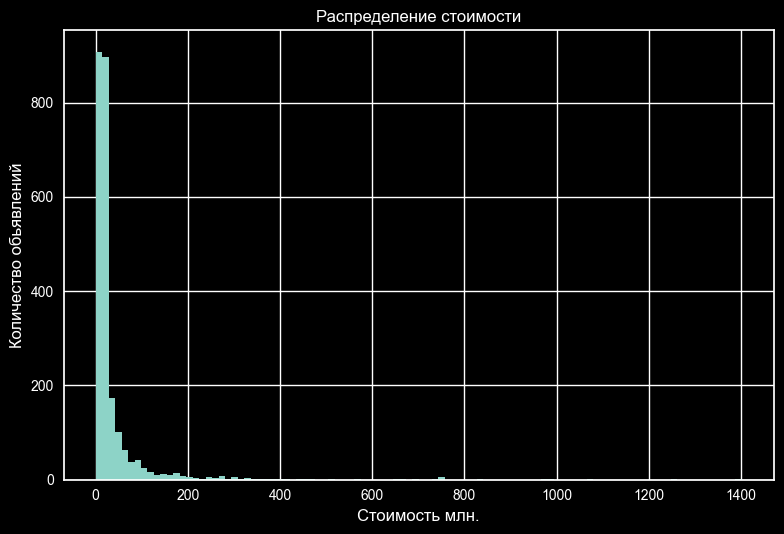

In [23]:
(df[[target]]/1_000_000).hist(bins=100)

plt.title('Распределение стоимости')
plt.ylabel('Количество обьявлений')
plt.xlabel('Стоимость млн.')
plt.tight_layout()
plt.show()

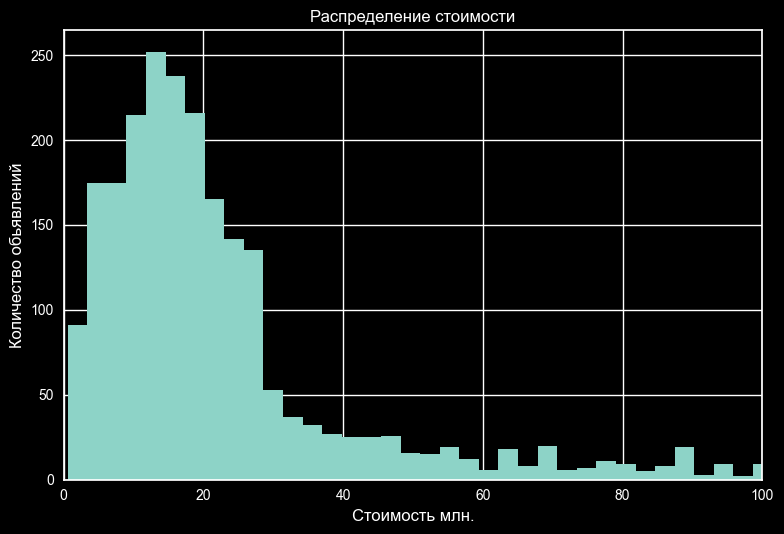

In [24]:
(df[[target]]/1_000_000).hist(bins=500)

plt.title('Распределение стоимости')
plt.ylabel('Количество обьявлений')
plt.xlabel('Стоимость млн.')
plt.xlim(0,100)
plt.tight_layout()
plt.show()

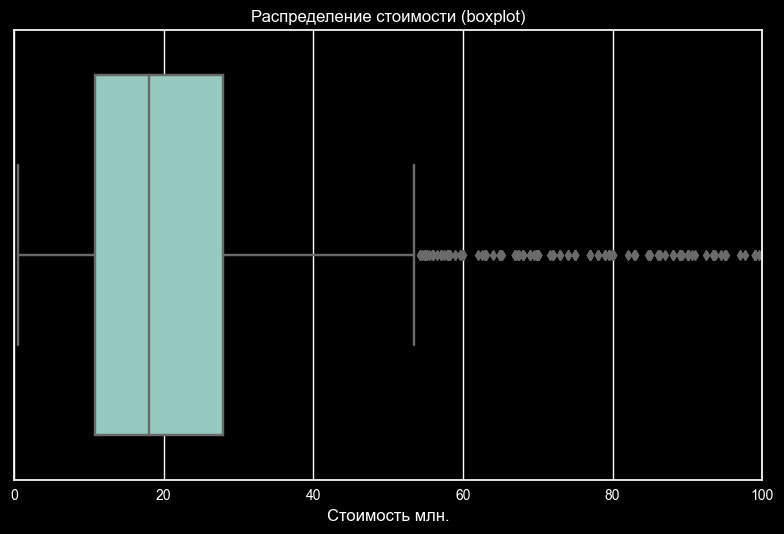

In [25]:
sns.boxplot(data=df[[target]]/1_000_000,x=target)

plt.title('Распределение стоимости (boxplot)')
plt.xlabel('Стоимость млн.')
plt.xlim(0,100)
plt.tight_layout()
plt.show()

In [26]:
df[good_cols]

,author_type,location,suburban_type,price,year_of_construction,house_material_type,land_plot,land_plot_status,living_meters,floors_count,district,underground,date
0,real_estate_agent,Жуковский,house,5000000,-1,Кирпичный,15.00,-1,45.00,1,NaN,м. Кратово,2024-04-22
1,homeowner,Жуковский,house,18800000,2021,Газобетонный блок,2.70,-1,145.00,2,NaN,м. Отдых,2024-04-22
2,real_estate_agent,Жуковский,house,7950000,2010,Газосиликатный блок,1.30,-1,73.30,2,NaN,м. Отдых,2024-04-22
3,real_estate_agent,Жуковский,house,9497000,2023,Каркасный,3.50,-1,120.00,2,NaN,м. Отдых,2024-04-22
4,realtor,Жуковский,house,5500000,-1,Деревянный,4.00,-1,56.00,2,NaN,м. Кратово,2024-04-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,homeowner,Долгопрудный,townhouse,30000000,2016,Монолитный,6.00,-1,263.00,3,NaN,м. Водники,2024-04-24
2384,homeowner,Долгопрудный,townhouse,40000000,2015,Кирпичный,6.00,-1,197.90,4,NaN,м. Новодачная,2024-04-24
2385,developer,Москва,townhouse,71684772,2024,Монолитный,1.00,-1,164.40,1,р-н Покровское-Стрешнево,м. Волоколамская,2024-04-24
2386,developer,Москва,townhouse,11000000,2023,-1,1.44,-1,78.00,2,Вороновское поселение,NaN,2024-04-24


In [27]:
num_cols = num_cols.to_list() + ['land_plot','living_meters']

In [28]:
cat_cols = ['author', 'author_type', 'url', 'location', 'deal_type',
            'accommodation_type', 'suburban_type', 'house_material_type',
            'land_plot_status', 'district', 'underground', 'street', 'house_number']

In [29]:
df[num_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   price                 2388 non-null   int64  
 1   year_of_construction  2388 non-null   int32  
 2   heating_type          2388 non-null   int64  
 3   gas_type              2388 non-null   int64  
 4   water_supply_type     2388 non-null   int64  
 5   sewage_system         2388 non-null   int64  
 6   bathroom              2388 non-null   int64  
 7   floors_count          2388 non-null   int64  
 8   phone                 2388 non-null   int64  
 9   price_per_month       1994 non-null   float64
 10  commissions           1994 non-null   float64
 11  land_plot             2388 non-null   float64
 12  living_meters         2388 non-null   float64
dtypes: float64(4), int32(1), int64(8)
memory usage: 233.3 KB


In [30]:
df[num_cols] = df[num_cols].replace(-1, np.NaN)

In [31]:
df[cat_cols] = df[cat_cols].replace('-1', np.NaN)

In [32]:
replace_id = (df[df['suburban_type'] == 'land-plot']
            [df['land_plot'].isna()==False]
            [['suburban_type']]).index

In [33]:
df.loc[replace_id,'suburban_type'] = 'house'

In [34]:
# prep_df = df[df['suburban_type']=='house'].reset_index(drop=True)
prep_df = df.copy().reset_index(drop=True)
ignore_cols.append('date')

In [35]:
prep_df

,author,author_type,url,location,deal_type,accommodation_type,suburban_type,price,year_of_construction,house_material_type,...,living_meters,floors_count,phone,district,underground,street,house_number,date,price_per_month,commissions
0,ЕГСН Продажа,real_estate_agent,https://zhukovsky.cian.ru/sale/suburban/292484...,Жуковский,sale,suburban,house,5000000,NaN,Кирпичный,...,45.00,1.0,79166327154,NaN,м. Кратово,3-я линия,NaN,2024-04-22,NaN,NaN
1,ID 17210260,homeowner,https://zhukovsky.cian.ru/sale/suburban/296176...,Жуковский,sale,suburban,house,18800000,2021.0,Газобетонный блок,...,145.00,2.0,79660643792,NaN,м. Отдых,шоссе Туполевское,NaN,2024-04-22,NaN,NaN
2,Владис Новый Город,real_estate_agent,https://zhukovsky.cian.ru/sale/suburban/300268...,Жуковский,sale,suburban,house,7950000,2010.0,Газосиликатный блок,...,73.30,2.0,79647961038,NaN,м. Отдых,Кооперативная улица,NaN,2024-04-22,NaN,NaN
3,Центральное,real_estate_agent,https://zhukovsky.cian.ru/sale/suburban/300876...,Жуковский,sale,suburban,house,9497000,2023.0,Каркасный,...,120.00,2.0,79057159228,NaN,м. Отдых,улица Фрунзе,NaN,2024-04-22,NaN,NaN
4,Лариса Бойцова,realtor,https://zhukovsky.cian.ru/sale/suburban/301007...,Жуковский,sale,suburban,house,5500000,NaN,Деревянный,...,56.00,2.0,79099574100,NaN,м. Кратово,NaN,NaN,2024-04-22,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2383,ID 112037767,homeowner,https://dolgoprudny.cian.ru/sale/suburban/2994...,Долгопрудный,sale,suburban,townhouse,30000000,2016.0,Монолитный,...,263.00,3.0,79646317443,NaN,м. Водники,проезд 3-й Московский,4,2024-04-24,NaN,0.0
2384,ID 106971257,homeowner,https://dolgoprudny.cian.ru/sale/suburban/2918...,Долгопрудный,sale,suburban,townhouse,40000000,2015.0,Кирпичный,...,197.90,4.0,79855847570,NaN,м. Новодачная,улица Береговая,10к1,2024-04-24,NaN,0.0
2385,Level Group,developer,https://www.cian.ru/sale/suburban/290326486/,Москва,sale,suburban,townhouse,71684772,2024.0,Монолитный,...,164.40,1.0,79031336372,р-н Покровское-Стрешнево,м. Волоколамская,Волоколамское шоссе,81К2С13,2024-04-24,NaN,0.0
2386,Optiland,developer,https://www.cian.ru/sale/suburban/300191691/,Москва,sale,suburban,townhouse,11000000,2023.0,NaN,...,78.00,2.0,79802122089,Вороновское поселение,NaN,NaN,NaN,2024-04-24,NaN,0.0


## Обучение модели

### Пробные эксперементы

In [36]:
cat_features = ['author_type', 'location', 'house_material_type',
                'land_plot_status', 'district', 'underground','suburban_type']
num_features = ['year_of_construction', 'floors_count','land_plot','living_meters']

In [37]:
prep_df_fill_cat_nans = prep_df.copy()
prep_df_fill_cat_nans[cat_features] =  prep_df[cat_features].fillna('___')

### Лучший эксперемент

In [44]:
%%chime 

exp = setup(prep_df_fill_cat_nans,target=target, ignore_features = ignore_cols,
        imputation_type = 'iterative', categorical_iterative_imputer = 'xgboost',
        numeric_iterative_imputer = 'xgboost', numeric_features=num_features,
        iterative_imputation_iters = 10, categorical_features=cat_features,
        train_size=0.9, fold=20, session_id=S, normalize=True)
            
best_model = exp.compare_models(include=['lightgbm','xgboost','gbr','rf','et','catboost','dummy'])

,Description,Value
0,Session id,100500
1,Target,price
2,Target type,Regression
3,Original data shape,"(2388, 27)"
4,Transformed data shape,"(2388, 44)"
5,Transformed train set shape,"(2149, 44)"
6,Transformed test set shape,"(239, 44)"
7,Ignore features,15
8,Numeric features,4
9,Categorical features,7


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,15603344.0168,3028100755135525.5000,50047244.6114,0.5111,0.4803,0.4447,3.3445
catboost,CatBoost Regressor,16055397.9437,3124572542253367.5000,50538777.5096,0.4955,0.4976,0.4543,4.0640
lightgbm,Light Gradient Boosting Machine,17516373.3164,3593555891191085.0000,53555125.8829,0.4798,0.5480,0.5040,2.8690
rf,Random Forest Regressor,15975796.0030,3394547836196323.0000,53060070.6454,0.4480,0.4849,0.4728,3.0415
gbr,Gradient Boosting Regressor,18158049.7455,3936521472467380.0000,57419759.8286,0.3432,0.5714,0.6187,2.6085
xgboost,Extreme Gradient Boosting,16804254.1560,3684700989767086.5000,55839170.9885,0.2874,0.5248,0.4787,2.6530
dummy,Dummy Regressor,35745940.5850,7206738663243754.0000,78709442.9472,-0.0276,1.2277,2.3480,2.5845


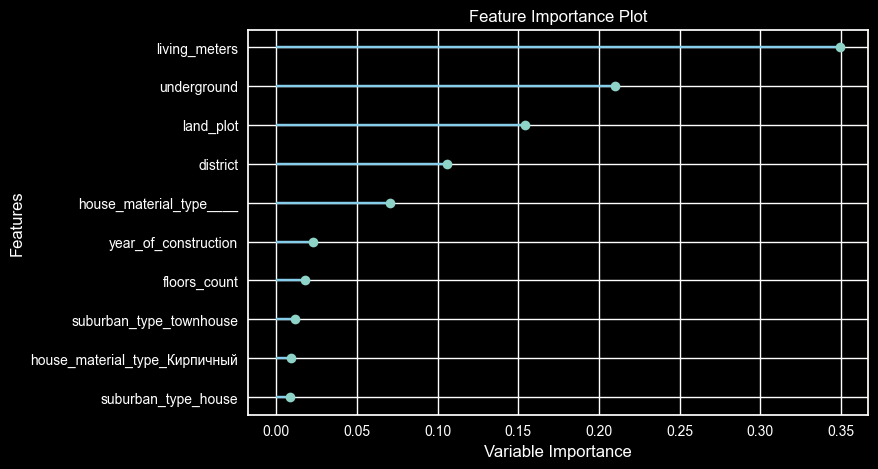

In [45]:
plot_model(best_model,'feature')

In [46]:
predict_model(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,13356315.6326,1320122898131271.2500,36333495.5397,0.9044,0.4212,0.3741


,author_type,location,suburban_type,year_of_construction,house_material_type,land_plot,land_plot_status,living_meters,floors_count,district,underground,price,prediction_label
2173,homeowner,Москва,townhouse,2005.0,Деревянный,1.00,___,33.000000,1.0,Воскресенское поселение,м. Ольховая,2900000,2.619443e+07
1687,real_estate_agent,Москва,house,2009.0,Кирпичный,12.00,___,246.600006,2.0,Первомайское поселение,м. Крёкшино,25000000,3.831805e+07
162,realtor,Раменское,house,2019.0,Блочный,8.10,___,130.100006,2.0,р-н Северный,м. Раменское,14100000,1.484164e+07
2302,real_estate_agent,Одинцово,townhouse,NaN,___,7.00,___,372.000000,3.0,___,м. Одинцово,70000000,1.936084e+08
2131,unknown,Москва,townhouse,2017.0,Кирпичный,2.05,___,300.000000,3.0,Сосенское поселение,м. Филатов Луг,47500000,6.029673e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,real_estate_agent,Раменское,house,2020.0,Газобетонный блок,7.50,___,152.000000,2.0,р-н Северный,м. Ипподром,15200000,1.376238e+07
502,real_estate_agent,Москва,house,NaN,___,28.90,___,646.400024,2.0,Первомайское поселение,м. Крёкшино,185000000,2.648080e+08
500,developer,Москва,house,NaN,Кирпичный,6.36,___,NaN,NaN,Вороновское поселение,___,7494000,1.294218e+07
2219,real_estate_agent,Домодедово,house,NaN,___,6.00,___,81.000000,1.0,___,___,5400000,6.393500e+06


In [47]:
final_model = finalize_model(best_model)
save_model(final_model, 'final_model' )

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('iterative_imputer',
                  TransformerWrapper(transformer=IterativeImputer(cat_estimator=XGBClassifier(base_score=None,
                                                                                              booster='gbtree',
                                                                                              callbacks=None,
                                                                                              colsample_bylevel=None,
                                                                                              colsample_bynode=None,
                                                                                              colsample_bytree=None,
                                                                                              device='cpu',
                                                                                              early_stopping_rounds=None,
      

In [115]:
preds = predict_model(best_model)
preds[['price','prediction_label']]/1_000_000

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,15490515.6739,2513763574535590.5000,50137446.8290,-0.0102,0.5609,0.6096


,price,prediction_label
493,175.000000,125.375634
1488,19.300000,20.251941
293,1.574025,4.695171
1600,22.900000,28.373714
1791,29.000000,24.471513
...,...,...
1673,25.000000,26.263499
1769,27.900000,61.463656
107,8.600000,10.675384
607,15.990000,16.440793


In [107]:
final_model = finalize_model(best_model)

#### Оптимизация

In [79]:
%%time
%%chime

tuned_model = exp.tune_model(best_model,n_iter=10, search_library='optuna',search_algorithm='tpe',
                                early_stopping=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,8302307.3244,250098480269820.9688,15814502.2138,0.7928,0.3896,0.3677
1,18197070.4956,5279920749977594.0000,72663063.1750,0.6578,0.4500,0.3910
2,13440712.6368,857921425156238.7500,29290295.7506,0.8716,0.5223,0.4561
3,18119636.6487,3273425689829100.0000,57213859.2461,0.7692,0.4735,0.3612
4,10987934.7207,658093083528068.6250,25653324.9995,0.8558,0.3500,0.3087
5,19103138.4198,3179306617756856.5000,56385340.4508,0.6693,0.4395,0.3660
6,10344612.4511,533259311095380.8125,23092408.0835,0.5123,0.4249,0.3619
7,34367641.1296,22249413238541576.0000,149162372.0599,0.3986,0.5712,0.3853
8,13808224.5434,1418681123040106.7500,37665383.6173,0.3247,0.5060,0.3996


[I 2024-04-23 22:55:21,595] Searching the best hyperparameters using 2051 samples...
[I 2024-04-24 00:31:48,128] Finished hyperparameter search!


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).
CPU times: total: 3h 9min 42s
Wall time: 1h 39min 6s


# Разделы ниже будут переработаны

### Без выбросов

In [ ]:
df_without_outliters = (prep_df_fill_cat_nans[prep_df_fill_cat_nans[target]<=50_000_000]
                        .copy().reset_index(drop=True))

In [ ]:
%%chime 

exp = setup(df_without_outliters,target=target, ignore_features = ignore_cols,
            imputation_type = 'iterative', categorical_iterative_imputer = 'xgboost',
            numeric_iterative_imputer = 'xgboost', numeric_features=num_features,
            iterative_imputation_iters = 10, categorical_features=cat_features,
            train_size=0.85, fold=20, session_id=S, normalize=True)
            
best_model = exp.create_model('catboost')

,Description,Value
0,Session id,100500
1,Target,price
2,Target type,Regression
3,Original data shape,"(1402, 27)"
4,Transformed data shape,"(1402, 33)"
5,Transformed train set shape,"(1191, 33)"
6,Transformed test set shape,"(211, 33)"
7,Ignore features,14
8,Numeric features,4
9,Date features,1


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3532237.8104,29078547379697.4336,5392452.8166,0.5830,0.2891,0.2274
1,4489515.5975,33611882612606.6875,5797575.5806,0.4876,0.4054,0.3572
2,4014751.4454,31849253303779.8281,5643514.2689,0.5736,0.3238,0.2560
3,4251325.1924,34890632236813.9531,5906829.2879,0.5244,0.3771,0.3178
4,3919521.3459,33376609796918.8555,5777249.3279,0.5777,0.3796,0.3228
5,4276847.4808,35113184614461.3008,5925637.9078,0.5950,0.3606,0.3168
6,4763475.0108,44965338879537.7109,6705619.9474,0.4185,0.3134,0.2582
7,4445640.9762,35250533737418.2422,5937215.9921,0.4368,0.3740,0.3315
8,4354305.6809,36539135320086.4766,6044760.9812,0.5177,0.3476,0.3089


### Не дорогие дома (меньше 25 млн.)

In [ ]:
low_cost_df = (prep_df_fill_cat_nans[prep_df_fill_cat_nans[target]<=25_000_000]
                        .copy().reset_index(drop=True))

In [ ]:
%%chime 

exp = setup(df_without_outliters,target=target, ignore_features = ignore_cols,
            imputation_type = 'iterative', categorical_iterative_imputer = 'xgboost',
            numeric_iterative_imputer = 'xgboost', numeric_features=num_features,
            iterative_imputation_iters = 10, categorical_features=cat_features,
            train_size=0.85, fold=20, session_id=S, normalize=True)
            
best_model = exp.create_model('catboost')

,Description,Value
0,Session id,100500
1,Target,price
2,Target type,Regression
3,Original data shape,"(1402, 27)"
4,Transformed data shape,"(1402, 33)"
5,Transformed train set shape,"(1191, 33)"
6,Transformed test set shape,"(211, 33)"
7,Ignore features,14
8,Numeric features,4
9,Date features,1


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3532237.8104,29078547379697.4336,5392452.8166,0.5830,0.2891,0.2274
1,4489515.5975,33611882612606.6875,5797575.5806,0.4876,0.4054,0.3572
2,4014751.4454,31849253303779.8281,5643514.2689,0.5736,0.3238,0.2560
3,4251325.1924,34890632236813.9531,5906829.2879,0.5244,0.3771,0.3178
4,3919521.3459,33376609796918.8555,5777249.3279,0.5777,0.3796,0.3228
5,4276847.4808,35113184614461.3008,5925637.9078,0.5950,0.3606,0.3168
6,4763475.0108,44965338879537.7109,6705619.9474,0.4185,0.3134,0.2582
7,4445640.9762,35250533737418.2422,5937215.9921,0.4368,0.3740,0.3315
8,4354305.6809,36539135320086.4766,6044760.9812,0.5177,0.3476,0.3089


### Далее